<a href="https://www.kaggle.com/code/youngdee/depression-model?scriptVersionId=221059825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install opendatasets --quiet

In [2]:
import os
import matplotlib
import numpy as np
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
import os
print(os.listdir("/kaggle/input"))

['d', 'student-depression-dataset']


In [5]:
print(os.listdir("/kaggle/input/student-depression-dataset"))

['Student Depression Dataset.csv']


In [6]:
dep_df = pd.read_csv("/kaggle/input/student-depression-dataset/Student Depression Dataset.csv")

In [7]:
dep_df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [8]:
dep_df.shape

(27901, 18)

In [9]:
dep_df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
dep_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27896    False
27897    False
27898    False
27899    False
27900    False
Length: 27901, dtype: bool

In [11]:
dep_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Financial Stress,27898.0,3.139867,1.437347,1.0,2.00,3.00,4.00,5.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [12]:
# Fill missing values with the mean 
dep_df['Financial Stress'] = dep_df['Financial Stress'].fillna(dep_df['Financial Stress'].mean())

In [13]:
dep_df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [14]:
# List of numerical columns (other than 'Depression')
numerical_columns = ['Academic Pressure', 'CGPA', 'Financial Stress', 'Work Pressure', 'Study Satisfaction']

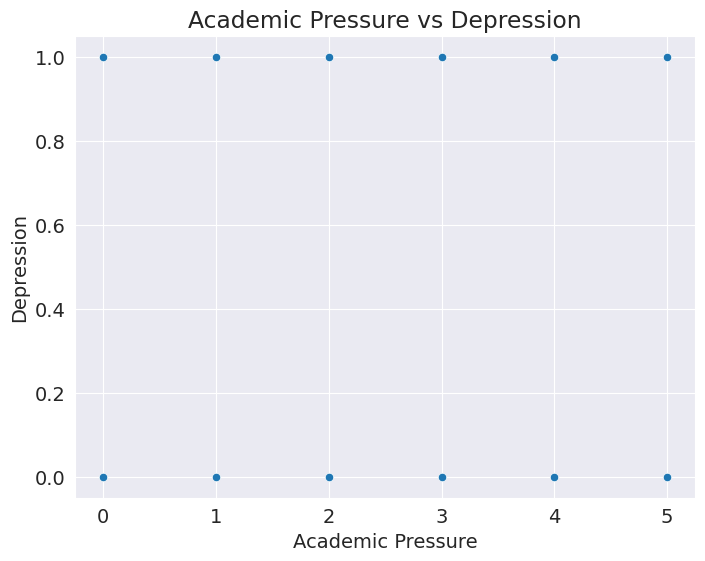

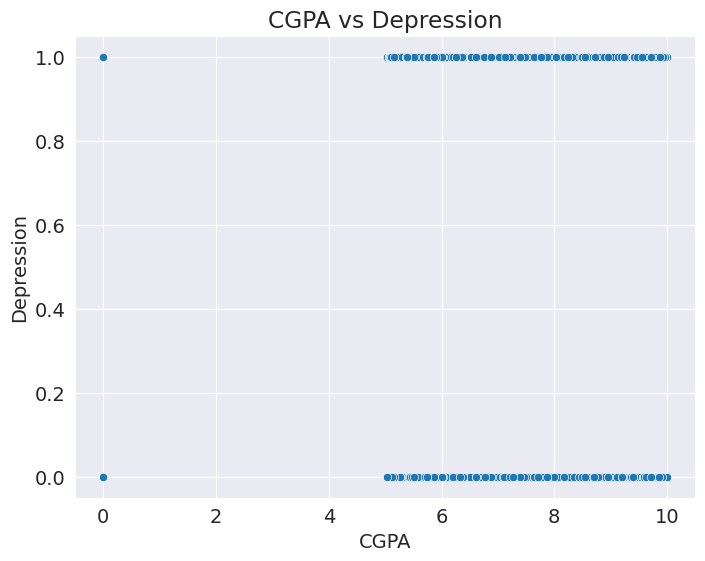

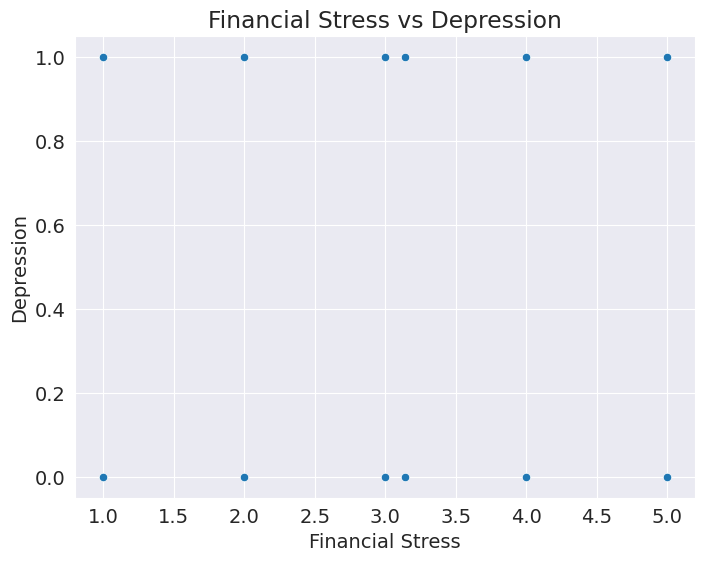

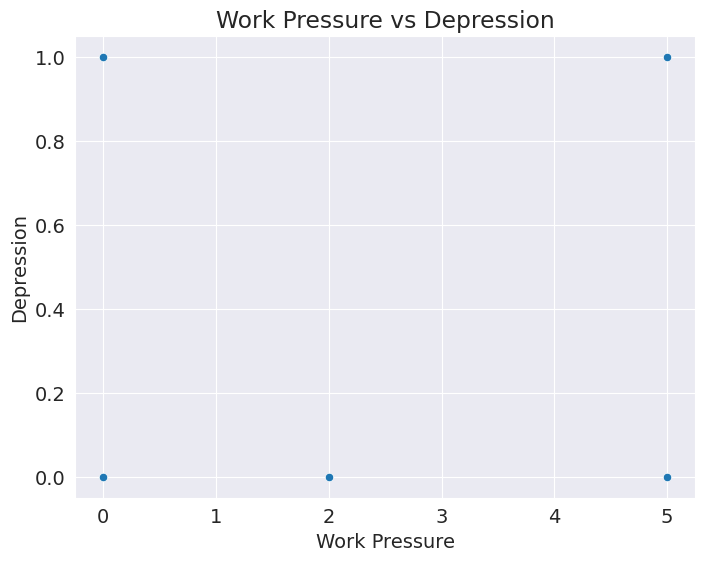

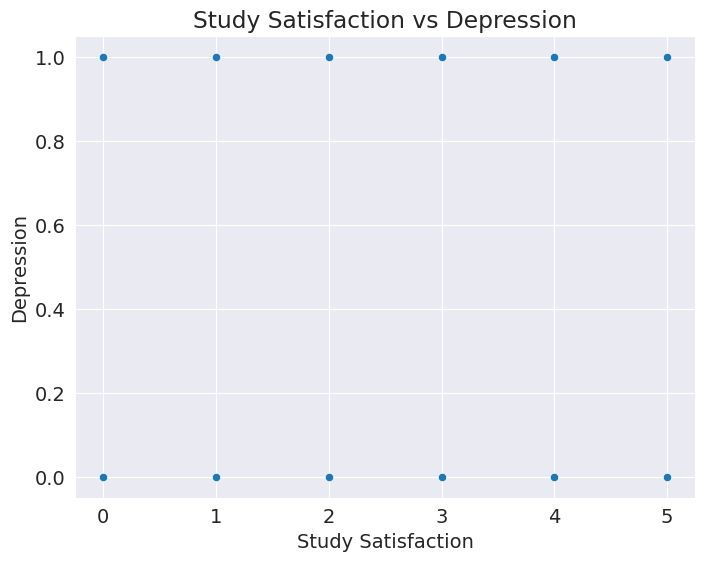

In [15]:
# Create scatter plots
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dep_df[column], y=dep_df['Depression'])
    plt.title(f'{column} vs Depression')
    plt.xlabel(column)
    plt.ylabel('Depression')
    plt.show()

In [16]:
dep_df[numerical_columns].describe()

,Academic Pressure,CGPA,Financial Stress,Work Pressure,Study Satisfaction
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,3.141214,7.656104,3.139867,0.000430,2.943837
std,1.381465,1.470707,1.437269,0.043992,1.361148
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,6.290000,2.000000,0.000000,2.000000
50%,3.000000,7.770000,3.000000,0.000000,3.000000
75%,4.000000,8.920000,4.000000,0.000000,4.000000
max,5.000000,10.000000,5.000000,5.000000,5.000000


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Standardize the numerical columns
scaler = StandardScaler()
dep_df_scaled = dep_df.copy()
numerical_columns = ['Academic Pressure', 'CGPA', 'Financial Stress', 'Work Pressure', 'Study Satisfaction']
dep_df_scaled[numerical_columns] = scaler.fit_transform(dep_df[numerical_columns])

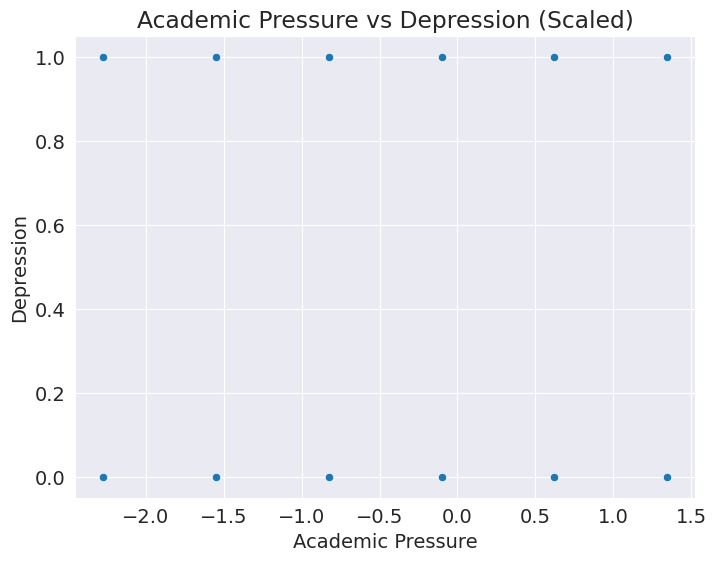

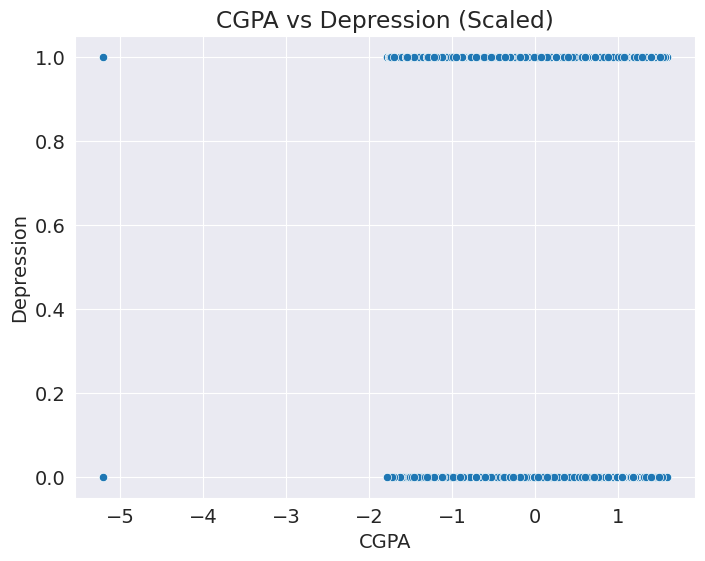

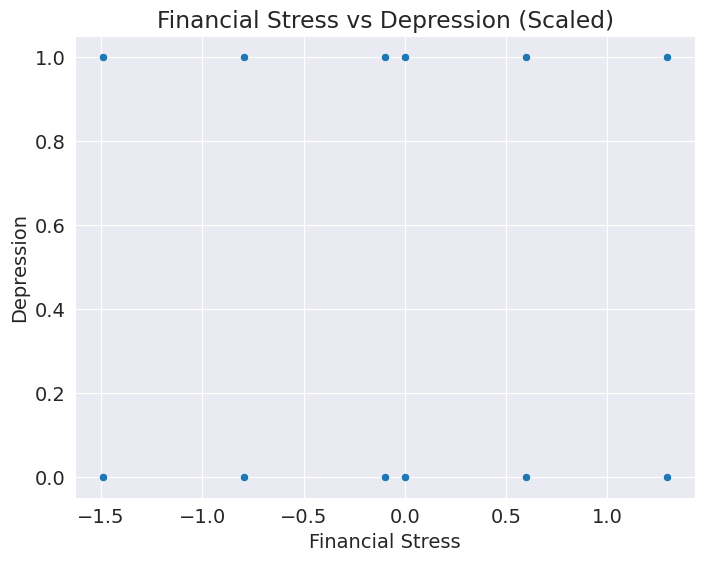

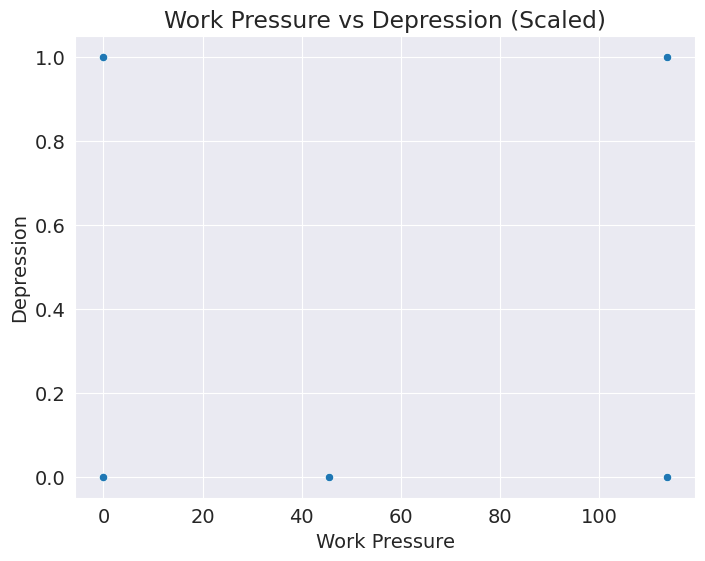

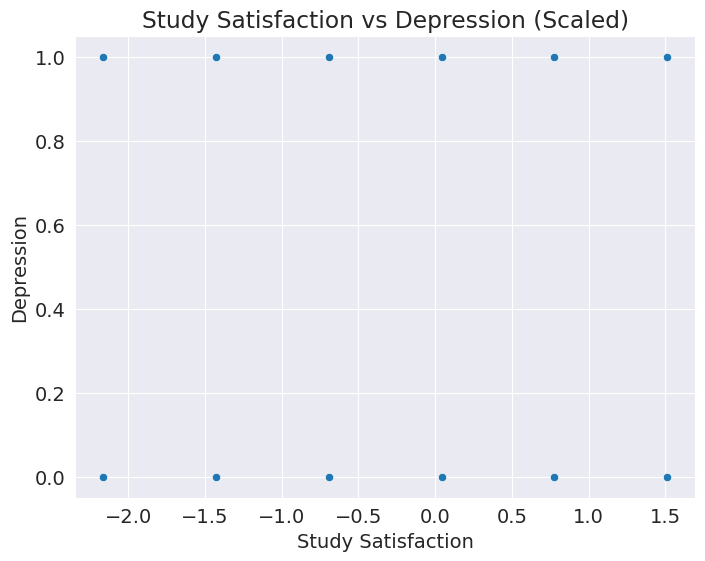

In [19]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dep_df_scaled[column], y=dep_df['Depression'])
    plt.title(f'{column} vs Depression (Scaled)')
    plt.xlabel(column)
    plt.ylabel('Depression')
    plt.show()

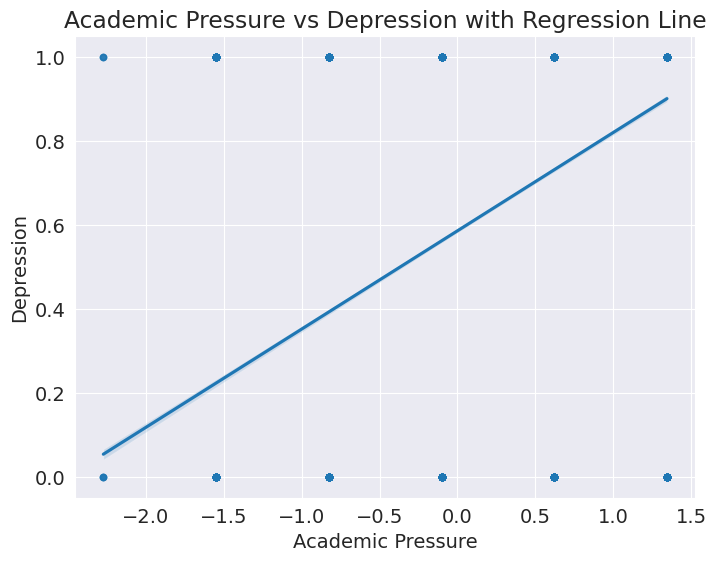

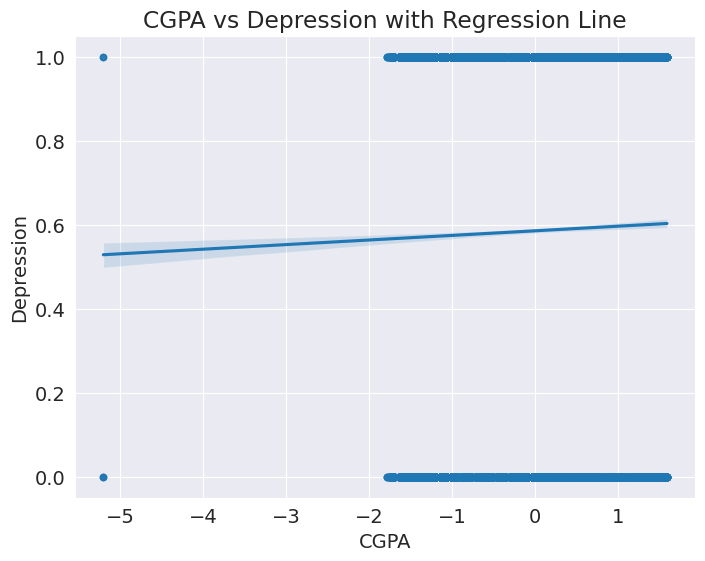

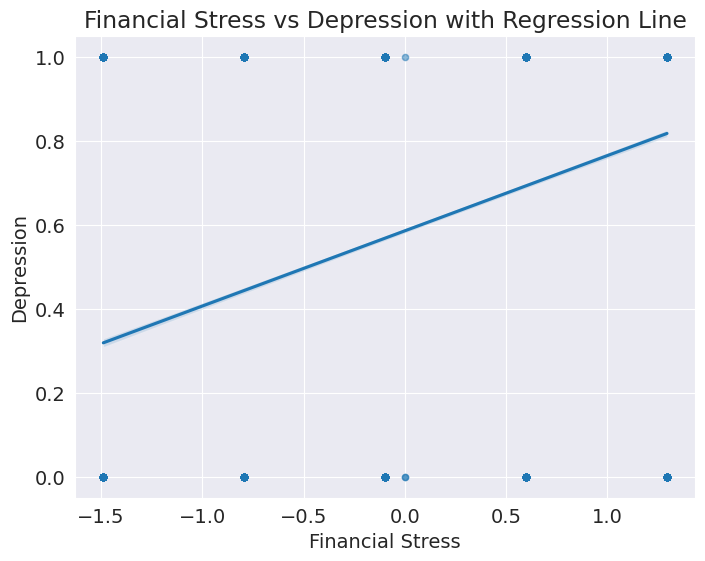

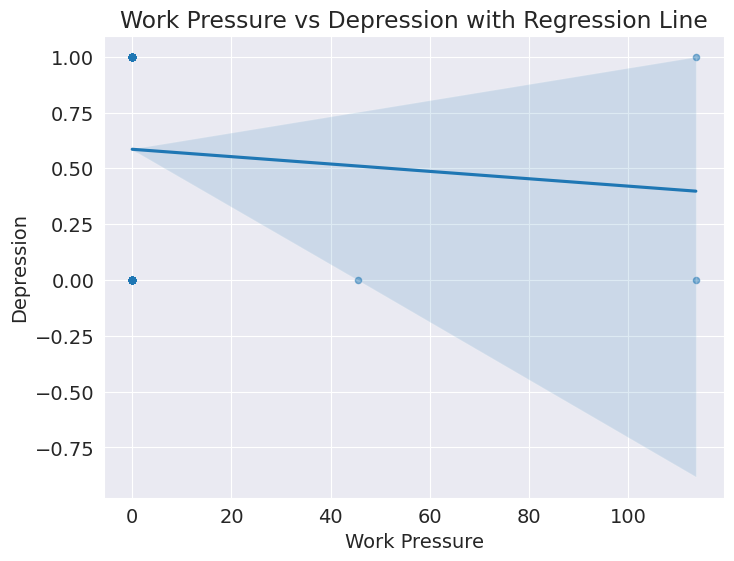

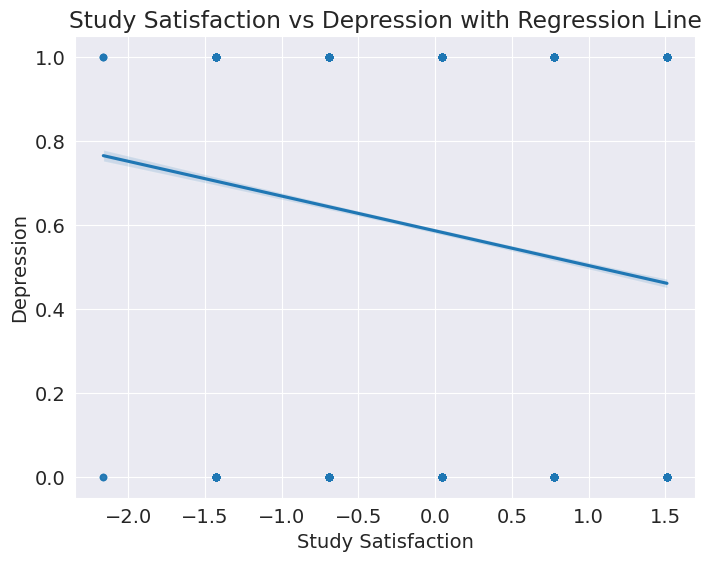

In [20]:
# Scatter plots with regression line
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=dep_df_scaled[column], y=dep_df['Depression'], scatter_kws={'s': 20, 'alpha': 0.5})
    plt.title(f'{column} vs Depression with Regression Line')
    plt.xlabel(column)
    plt.ylabel('Depression')
    plt.show()

In [21]:
categorical_columns = ['Gender', 'City', 'Profession', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

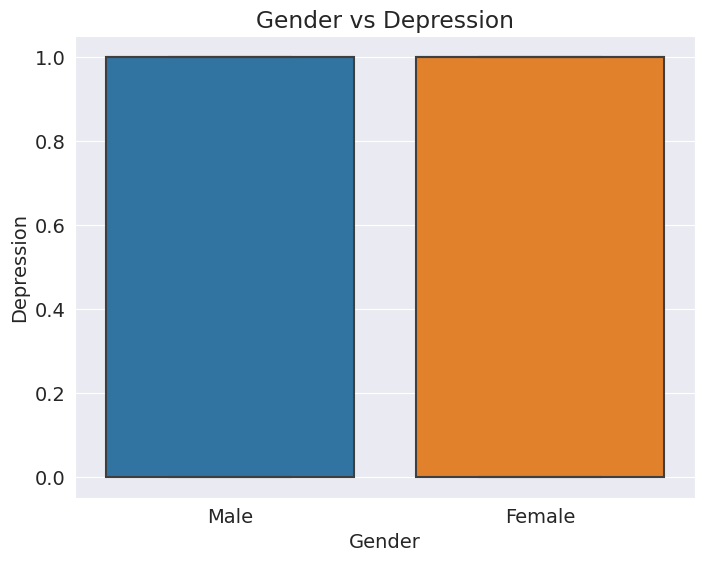

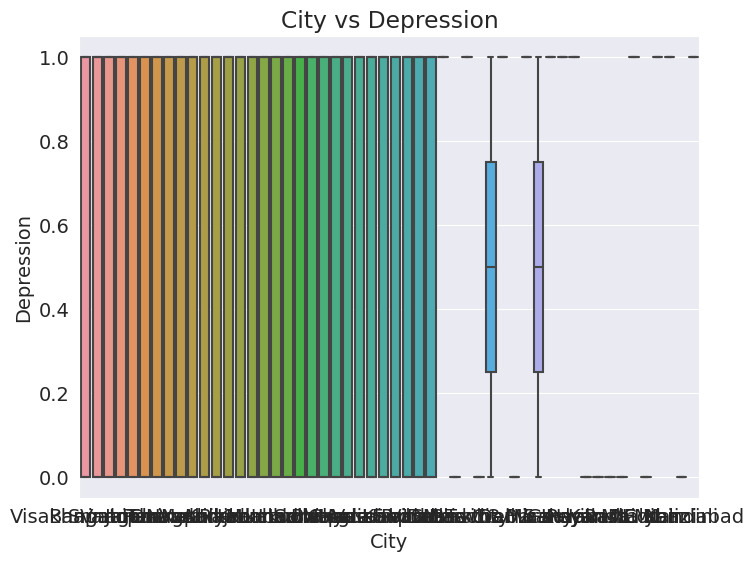

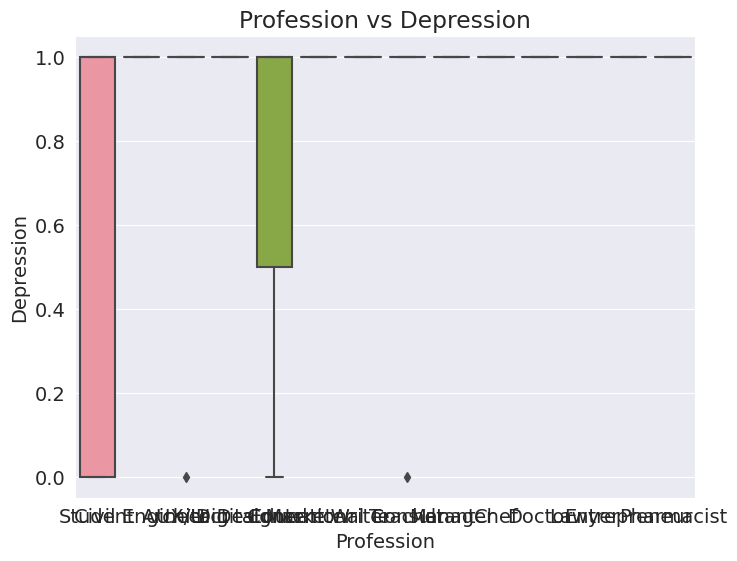

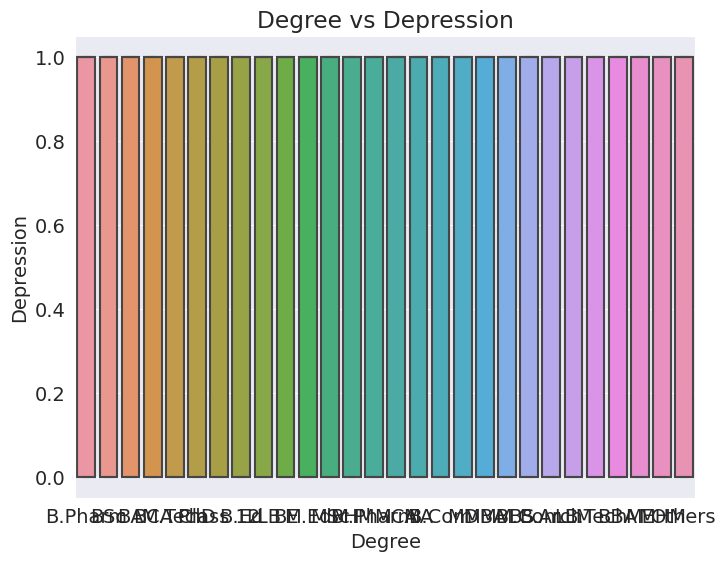

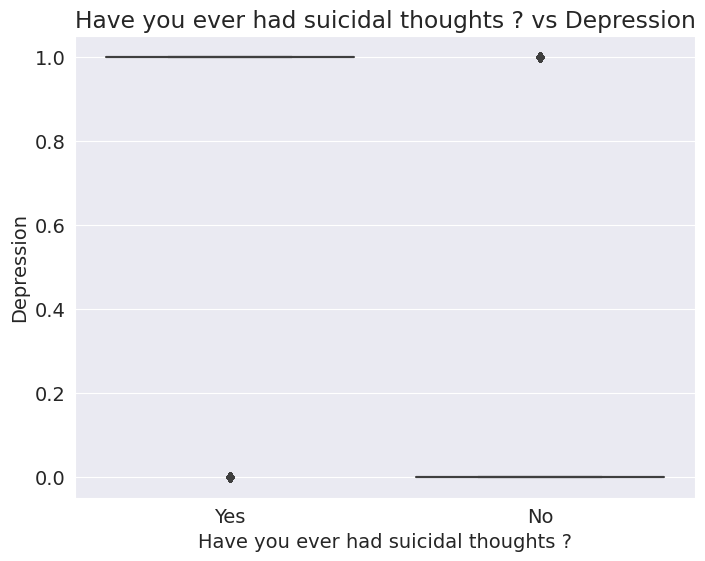

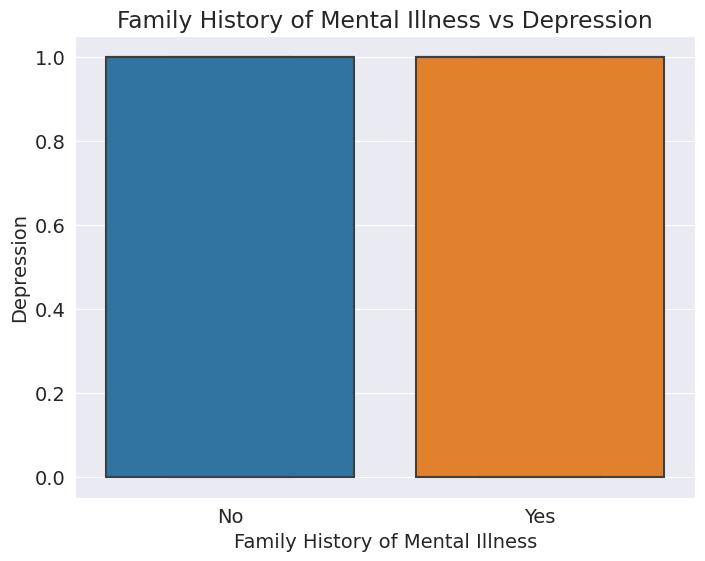

In [22]:
# Create box plots
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dep_df[column], y=dep_df['Depression'])
    plt.title(f'{column} vs Depression')
    plt.xlabel(column)
    plt.ylabel('Depression')
    plt.show()

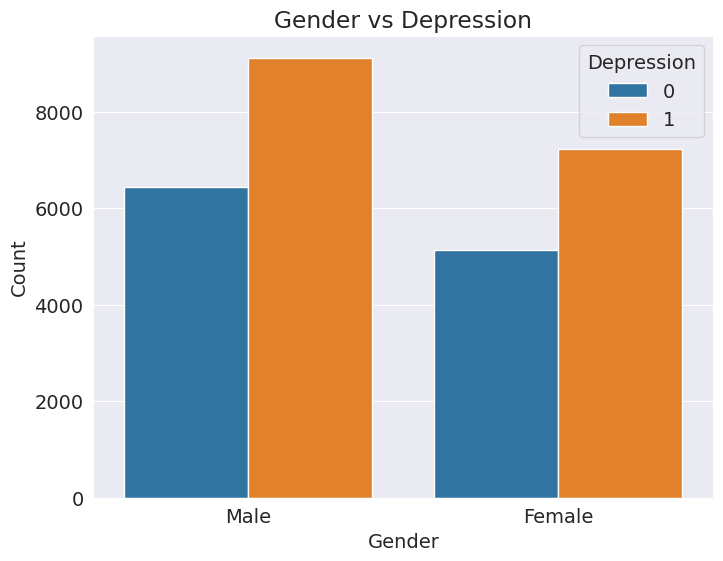

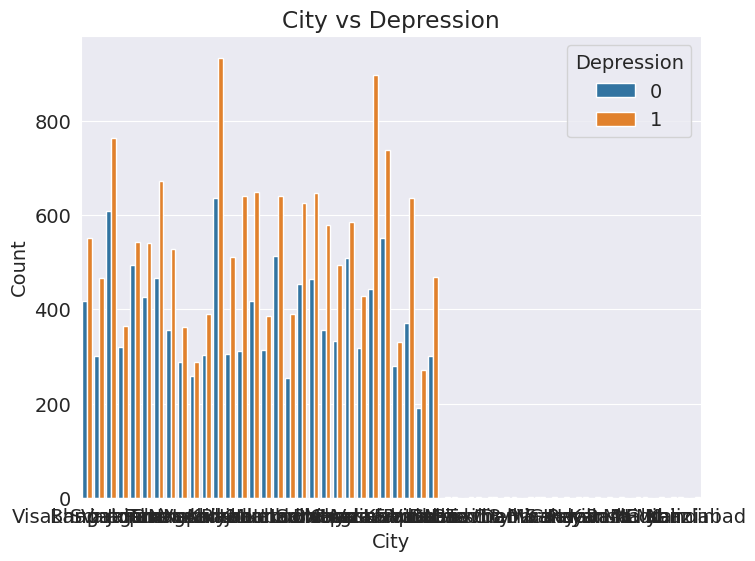

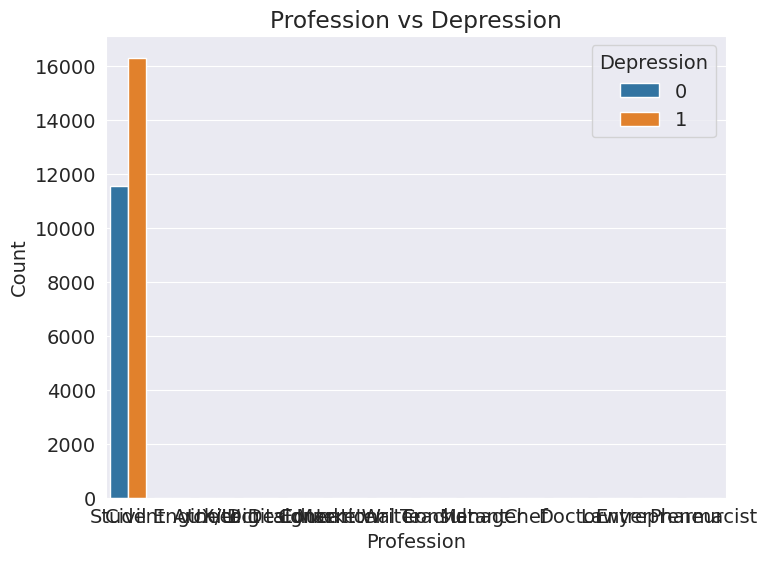

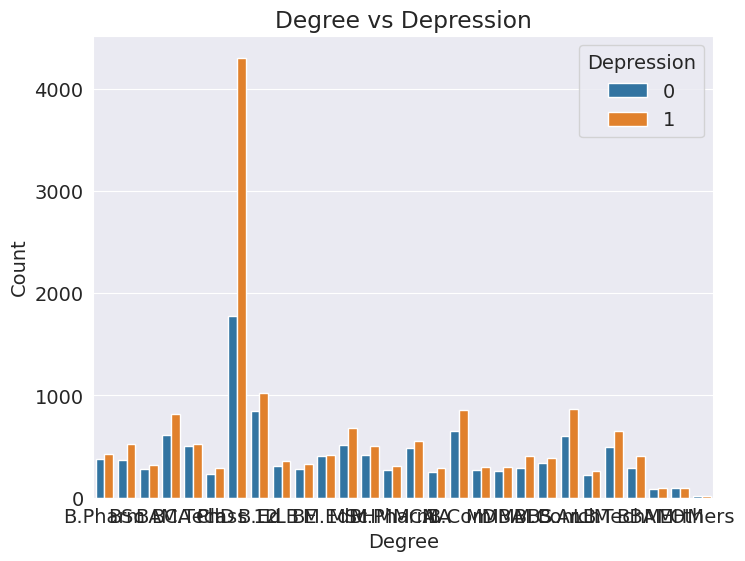

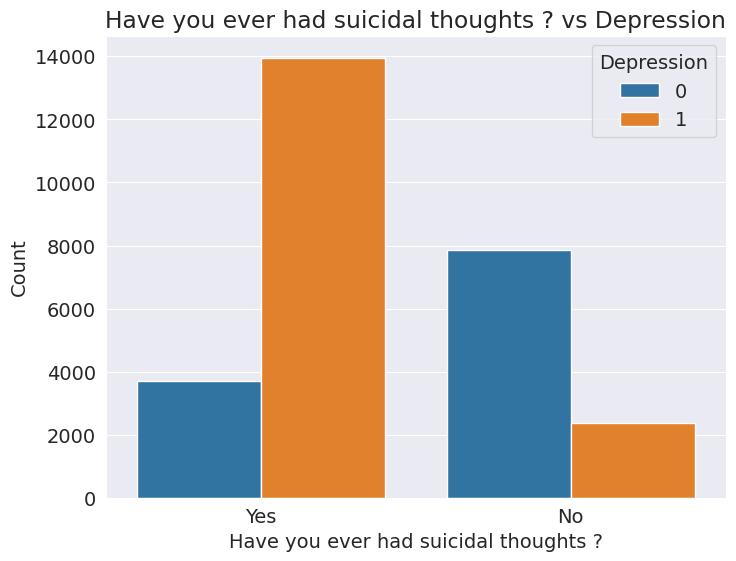

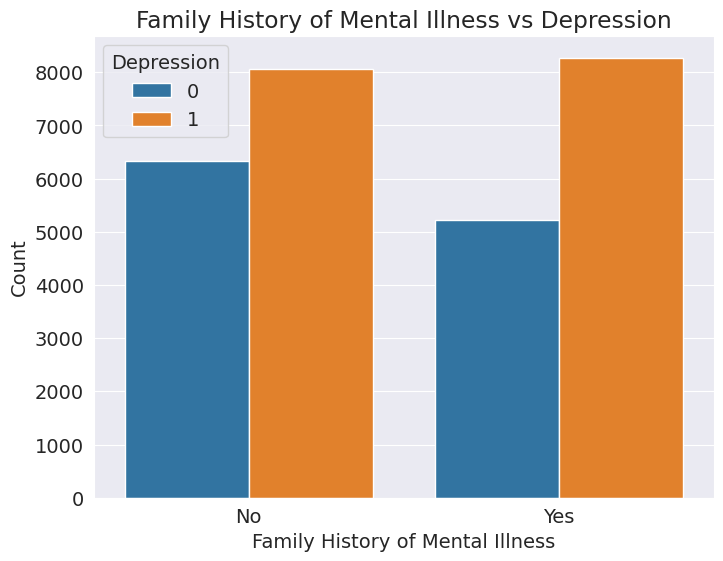

In [23]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=dep_df[column], hue='Depression', data=dep_df)
    plt.title(f'{column} vs Depression')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

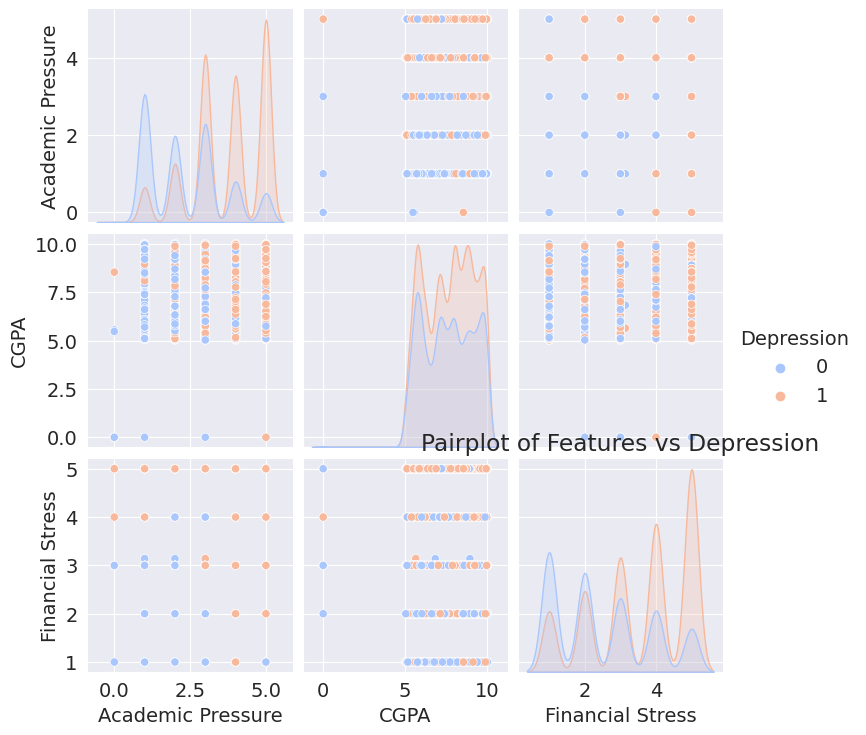

In [24]:
sns.pairplot(dep_df[['Academic Pressure', 'CGPA', 'Financial Stress', 'Depression']], hue='Depression', palette='coolwarm')
plt.title("Pairplot of Features vs Depression")
plt.show()

In [25]:
dep_df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [26]:
dep_df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


In [27]:
dep_df.shape

(27901, 18)

In [28]:
# Drop the 'City' column
dep_df = dep_df.drop('City', axis=1)

In [29]:
dep_df.head()

,id,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Encode Categorical Variables

In [30]:
# One-Hot Encoding for categorical columns
categorical_columns = ['Gender', 'Profession', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

dep_df_encoded = pd.get_dummies(dep_df, columns=categorical_columns, drop_first=True)

In [31]:
dep_df_encoded.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,5-6 hours,3.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,5-6 hours,3.0,2.0,...,False,False,False,False,False,False,False,False,False,True
2,26,31.0,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,9.0,1.0,...,False,False,False,False,False,False,False,False,False,True
3,30,28.0,3.0,0.0,5.59,2.0,0.0,7-8 hours,4.0,5.0,...,False,False,False,False,False,False,False,False,True,True
4,32,25.0,4.0,0.0,8.13,3.0,0.0,5-6 hours,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False


In [32]:
dep_df_encoded.columns

Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Work/Study Hours', 'Financial Stress', 'Depression', 'Gender_Male',
       'Profession_Chef', 'Profession_Civil Engineer',
       'Profession_Content Writer', 'Profession_Digital Marketer',
       'Profession_Doctor', 'Profession_Educational Consultant',
       'Profession_Entrepreneur', 'Profession_Lawyer', 'Profession_Manager',
       'Profession_Pharmacist', 'Profession_Student', 'Profession_Teacher',
       'Profession_UX/UI Designer', 'Dietary Habits_Moderate',
       'Dietary Habits_Others', 'Dietary Habits_Unhealthy', 'Degree_B.Com',
       'Degree_B.Ed', 'Degree_B.Pharm', 'Degree_B.Tech', 'Degree_BA',
       'Degree_BBA', 'Degree_BCA', 'Degree_BE', 'Degree_BHM', 'Degree_BSc',
       'Degree_Class 12', 'Degree_LLB', 'Degree_LLM', 'Degree_M.Com',
       'Degree_M.Ed', 'Degree_M.Pharm', 'Degree_M.Tech', 'Degree_MA',
       'Degree_MBA', 'Degr

In [33]:
dep_df_encoded.shape

(27901, 57)

## Normalize or Scale Numerical Values

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
numerical_columns = ['Academic Pressure', 'CGPA', 'Financial Stress', 'Work Pressure', 'Study Satisfaction']

In [37]:
dep_df_encoded[numerical_columns] = scaler.fit_transform(dep_df_encoded[numerical_columns])

In [38]:
dep_df_encoded.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,1.345543,-0.009777,0.893393,-0.693425,0.0,5-6 hours,3.0,-1.488868,...,False,False,False,False,False,False,False,False,True,False
1,8,24.0,-0.826104,-0.009777,-1.194076,1.510636,0.0,5-6 hours,3.0,-0.793092,...,False,False,False,False,False,False,False,False,False,True
2,26,31.0,-0.102222,-0.009777,-0.425724,1.510636,0.0,Less than 5 hours,9.0,-1.488868,...,False,False,False,False,False,False,False,False,False,True
3,30,28.0,-0.102222,-0.009777,-1.404862,-0.693425,0.0,7-8 hours,4.0,1.294237,...,False,False,False,False,False,False,False,False,True,True
4,32,25.0,0.621660,-0.009777,0.322229,0.041262,0.0,5-6 hours,1.0,-1.488868,...,False,False,False,False,False,False,False,False,True,False


In [39]:
import re

In [40]:
def convert_sleep_duration(sleep_duration):
    match = re.findall(r'\d+', sleep_duration)
    if len(match) == 2:
        lower, upper = map(int, match)
        return (lower + upper) / 2
    elif len(match) == 1:
        return int(match[0])
    else:
        return None

In [41]:
dep_df_encoded['Sleep Duration'] = dep_df_encoded['Sleep Duration'].apply(convert_sleep_duration)

In [42]:
dep_df_encoded['Sleep Duration'].head()

0    5.5
1    5.5
2    5.0
3    7.5
4    5.5
Name: Sleep Duration, dtype: float64

In [43]:
# Scaling the Sleep Duration column
dep_df_encoded['Sleep Duration'] = scaler.fit_transform(dep_df_encoded[['Sleep Duration']])

In [44]:
dep_df_encoded.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,1.345543,-0.009777,0.893393,-0.693425,0.0,-0.718893,3.0,-1.488868,...,False,False,False,False,False,False,False,False,True,False
1,8,24.0,-0.826104,-0.009777,-1.194076,1.510636,0.0,-0.718893,3.0,-0.793092,...,False,False,False,False,False,False,False,False,False,True
2,26,31.0,-0.102222,-0.009777,-0.425724,1.510636,0.0,-1.109678,9.0,-1.488868,...,False,False,False,False,False,False,False,False,False,True
3,30,28.0,-0.102222,-0.009777,-1.404862,-0.693425,0.0,0.844245,4.0,1.294237,...,False,False,False,False,False,False,False,False,True,True
4,32,25.0,0.621660,-0.009777,0.322229,0.041262,0.0,-0.718893,1.0,-1.488868,...,False,False,False,False,False,False,False,False,True,False


In [45]:
dep_df_encoded.tail()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
27896,140685,27.0,1.345543,-0.009777,-1.296069,1.510636,0.0,-0.718893,7.0,-1.488868,...,False,False,False,False,False,False,False,False,True,True
27897,140686,27.0,-0.826104,-0.009777,1.185774,0.041262,0.0,-1.109678,0.0,-0.097316,...,False,False,False,False,False,True,False,False,False,True
27898,140689,31.0,-0.102222,-0.009777,-0.711306,0.775949,0.0,-0.718893,12.0,-0.793092,...,False,False,True,False,False,False,False,False,False,False
27899,140690,18.0,1.345543,-0.009777,-0.527718,-0.693425,0.0,-1.109678,10.0,1.294237,...,False,False,False,False,False,False,False,False,True,False
27900,140699,27.0,0.621660,-0.009777,1.076981,-1.428112,0.0,-1.109678,2.0,-0.097316,...,False,False,False,False,False,False,False,False,True,True


In [46]:
# Drop the 'id' column
dep_df_encoded = dep_df_encoded.drop('id', axis=1)

In [47]:
dep_df_encoded.isna().sum()

Age                                           0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                          0
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                               18
Work/Study Hours                              0
Financial Stress                              0
Depression                                    0
Gender_Male                                   0
Profession_Chef                               0
Profession_Civil Engineer                     0
Profession_Content Writer                     0
Profession_Digital Marketer                   0
Profession_Doctor                             0
Profession_Educational Consultant             0
Profession_Entrepreneur                       0
Profession_Lawyer                             0
Profession_Manager                            0
Profession_Pharmacist                   

In [48]:
mean_sleep_duration = dep_df_encoded['Sleep Duration'].mean()
dep_df_encoded['Sleep Duration'].fillna(mean_sleep_duration, inplace=True)
dep_df_encoded['Sleep Duration'].isnull().sum()

0

In [49]:
dep_df_encoded.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27896    False
27897    False
27898    False
27899    False
27900    False
Length: 27901, dtype: bool

In [50]:
dep_df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,27901.0,2.582230e+01,4.905687,18.000000,21.000000,25.000000,30.000000,59.000000
Academic Pressure,27901.0,1.871793e-17,1.000018,-2.273869,-0.826104,-0.102222,0.621660,1.345543
Work Pressure,27901.0,-2.037326e-18,1.000018,-0.009777,-0.009777,-0.009777,-0.009777,113.649206
CGPA,27901.0,4.008438e-16,1.000018,-5.205822,-0.928892,0.077444,0.859395,1.593749
Study Satisfaction,27901.0,4.456650e-18,1.000018,-2.162799,-0.693425,0.041262,0.775949,1.510636
Job Satisfaction,27901.0,6.809792e-04,0.044394,0.000000,0.000000,0.000000,0.000000,4.000000
Sleep Duration,27901.0,3.466000e-16,0.999695,-1.109678,-1.109678,-0.718893,0.844245,1.235030
Work/Study Hours,27901.0,7.156984e+00,3.707642,0.000000,4.000000,8.000000,10.000000,12.000000
Financial Stress,27901.0,-8.149302e-18,1.000018,-1.488868,-0.793092,-0.097316,0.598460,1.294237
Depression,27901.0,5.854987e-01,0.492645,0.000000,0.000000,1.000000,1.000000,1.000000


## Data splitting

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = dep_df_encoded.drop('Depression', axis=1) 
y = dep_df_encoded['Depression'] 

In [53]:
X

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,33.0,1.345543,-0.009777,0.893393,-0.693425,0.0,-0.718893,3.0,-1.488868,True,...,False,False,False,False,False,False,False,False,True,False
1,24.0,-0.826104,-0.009777,-1.194076,1.510636,0.0,-0.718893,3.0,-0.793092,False,...,False,False,False,False,False,False,False,False,False,True
2,31.0,-0.102222,-0.009777,-0.425724,1.510636,0.0,-1.109678,9.0,-1.488868,True,...,False,False,False,False,False,False,False,False,False,True
3,28.0,-0.102222,-0.009777,-1.404862,-0.693425,0.0,0.844245,4.0,1.294237,False,...,False,False,False,False,False,False,False,False,True,True
4,25.0,0.621660,-0.009777,0.322229,0.041262,0.0,-0.718893,1.0,-1.488868,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,1.345543,-0.009777,-1.296069,1.510636,0.0,-0.718893,7.0,-1.488868,False,...,False,False,False,False,False,False,False,False,True,True
27897,27.0,-0.826104,-0.009777,1.185774,0.041262,0.0,-1.109678,0.0,-0.097316,True,...,False,False,False,False,False,True,False,False,False,True
27898,31.0,-0.102222,-0.009777,-0.711306,0.775949,0.0,-0.718893,12.0,-0.793092,True,...,False,False,True,False,False,False,False,False,False,False
27899,18.0,1.345543,-0.009777,-0.527718,-0.693425,0.0,-1.109678,10.0,1.294237,False,...,False,False,False,False,False,False,False,False,True,False


In [54]:
# Split the data: 60% training, 20% validation, 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Further split X_temp and y_temp into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [55]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (16740, 55), (16740,)
Validation set: (5580, 55), (5580,)
Test set: (5581, 55), (5581,)


## Training the model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [57]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "HistGradient Boosting": HistGradientBoostingClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
}

In [58]:
results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train on the combined training + validation set
    model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
    
    # Predict on test set
    y_pred_test = model.predict(X_test)
    
    # Predict on validation set for validation evaluation
    y_pred_val = model.predict(X_val)
    
    # Evaluate on validation set
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_precision = precision_score(y_val, y_pred_val, average='weighted')
    val_recall = recall_score(y_val, y_pred_val, average='weighted')
    val_f1 = f1_score(y_val, y_pred_val, average='weighted')
    
    # Evaluate on test set
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    # Store results
    results.append({
        "Model": model_name,
        "Validation Accuracy": val_accuracy,
        "Validation Precision": val_precision,
        "Validation Recall": val_recall,
        "Validation F1 Score": val_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance:")
print(results_df.sort_values(by="Test F1 Score", ascending=False))

Training Logistic Regression...
Training Random Forest...
Training Support Vector Machine...
Training K-Nearest Neighbors...
Training Decision Tree...
Training Naive Bayes...
Training AdaBoost...
Training Gradient Boosting...
Training HistGradient Boosting...
Training Bagging...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13068, number of negative: 9252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 22320, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585484 -> initscore=0.345327
[LightGBM] [Info] Start training from score 0.345327

Model Performance:
                     Mode

## Training the model using Random Forest

In [59]:
rf_model = RandomForestClassifier(random_state=42)

In [60]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [62]:
print(f"Random Forest Training Accuracy: {train_accuracy:.4f}")
print(f"Random Forest Validation Accuracy: {val_accuracy:.4f}")

Random Forest Training Accuracy: 1.0000
Random Forest Validation Accuracy: 0.8801


In [63]:
# Check for overfitting
if train_accuracy > val_accuracy + 0.1:
    print("The model might be overfitting.")
elif train_accuracy < val_accuracy:
    print("The model might be underfitting.")
else:
    print("The model is generalizing well.")

The model might be overfitting.


## Methods to reduce Overfitting

### 1. Increase Regularization:

In [64]:
rf_model_regularized = RandomForestClassifier(
    random_state=42,
    max_depth=10,              
    min_samples_split=20,      
    min_samples_leaf=10,       
    max_features="sqrt",       
    n_estimators=100           
)

In [65]:
rf_model_regularized.fit(X_train, y_train)

train_accuracy_regularized = accuracy_score(y_train, rf_model_regularized.predict(X_train))
val_accuracy_regularized = accuracy_score(y_val, rf_model_regularized.predict(X_val))

In [66]:
print(f"Increased Regularization - Training Accuracy: {train_accuracy_regularized:.4f}")
print(f"Increased Regularization - Validation Accuracy: {val_accuracy_regularized:.4f}")

Increased Regularization - Training Accuracy: 0.8527
Increased Regularization - Validation Accuracy: 0.8468


In [67]:
y_pred = rf_model_regularized.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8346


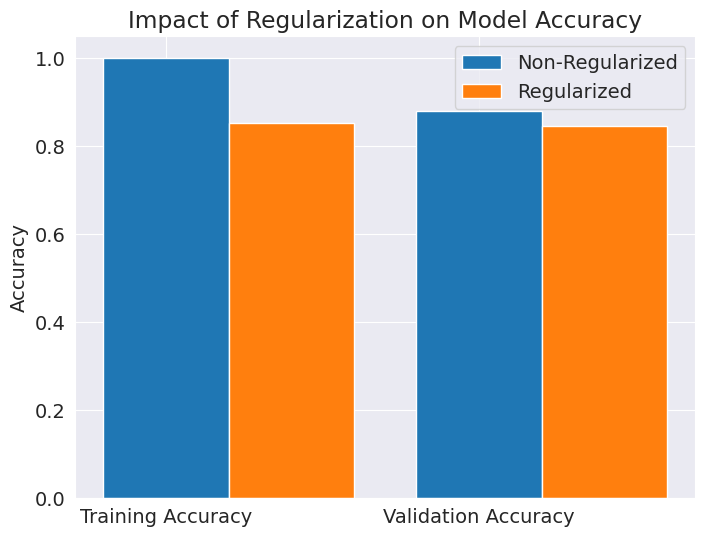

In [68]:
regularization_results = {
    'Non-Regularized': [train_accuracy, val_accuracy],
    'Regularized': [train_accuracy_regularized, val_accuracy_regularized]
}

labels = ['Training Accuracy', 'Validation Accuracy']
non_regularized_vals = regularization_results['Non-Regularized']
regularized_vals = regularization_results['Regularized']

x = range(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(x, non_regularized_vals, width=0.4, label='Non-Regularized', align='center')
plt.bar([i + 0.4 for i in x], regularized_vals, width=0.4, label='Regularized', align='center')

plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Impact of Regularization on Model Accuracy')
plt.legend()

plt.show()

### 2. Use Cross-Validation:

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

In [71]:
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Scores: [0.83602151 0.84020311 0.83900836 0.84259259 0.83990442]
Average Cross-Validation Accuracy: 0.8395


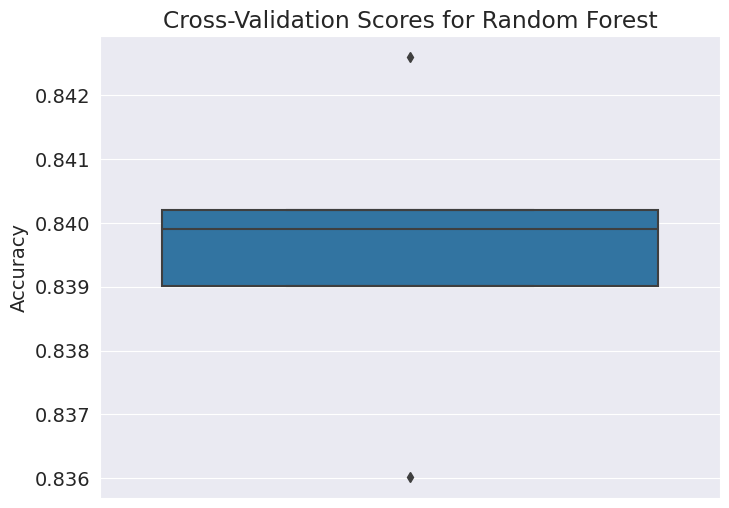

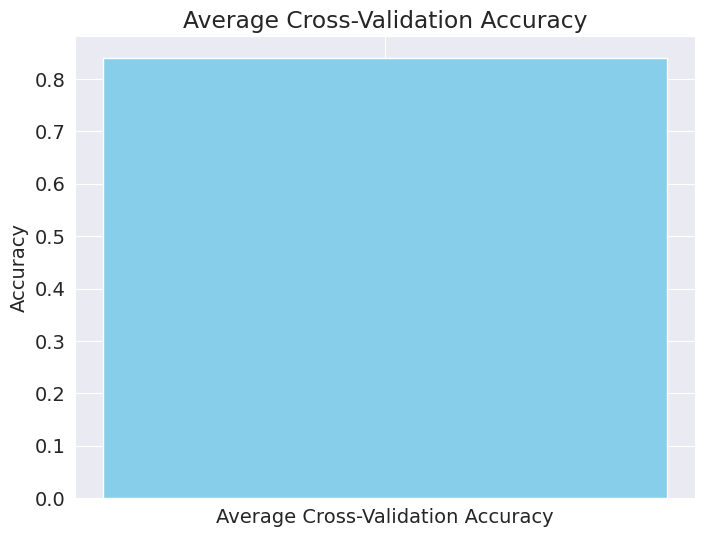

In [72]:
# Cross-validation scores box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores)
plt.title('Cross-Validation Scores for Random Forest')
plt.ylabel('Accuracy')
plt.show()

# Plotting average accuracy of Cross-Validation
plt.figure(figsize=(8, 6))
plt.bar(['Average Cross-Validation Accuracy'], [np.mean(cv_scores)], color='skyblue')
plt.ylabel('Accuracy')
plt.title('Average Cross-Validation Accuracy')
plt.show()

### 3. Ensemble Learning (Bagging or Boosting):

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [74]:
ada_boost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),  
    n_estimators=100,
    random_state=42
)

ada_boost_model.fit(X_train, y_train)

train_accuracy_ada = accuracy_score(y_train, ada_boost_model.predict(X_train))
val_accuracy_ada = accuracy_score(y_val, ada_boost_model.predict(X_val))

print(f"AdaBoost - Training Accuracy: {train_accuracy_ada:.4f}")
print(f"AdaBoost - Validation Accuracy: {val_accuracy_ada:.4f}")

AdaBoost - Training Accuracy: 0.8674
AdaBoost - Validation Accuracy: 0.8382


In [75]:
ada_boost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),  
    n_estimators=200,
    random_state=42
)

ada_boost_model.fit(X_train, y_train)

train_accuracy_ada = accuracy_score(y_train, ada_boost_model.predict(X_train))
val_accuracy_ada = accuracy_score(y_val, ada_boost_model.predict(X_val))

print(f"AdaBoost - Training Accuracy: {train_accuracy_ada:.4f}")
print(f"AdaBoost - Validation Accuracy: {val_accuracy_ada:.4f}")

AdaBoost - Training Accuracy: 0.8855
AdaBoost - Validation Accuracy: 0.8321


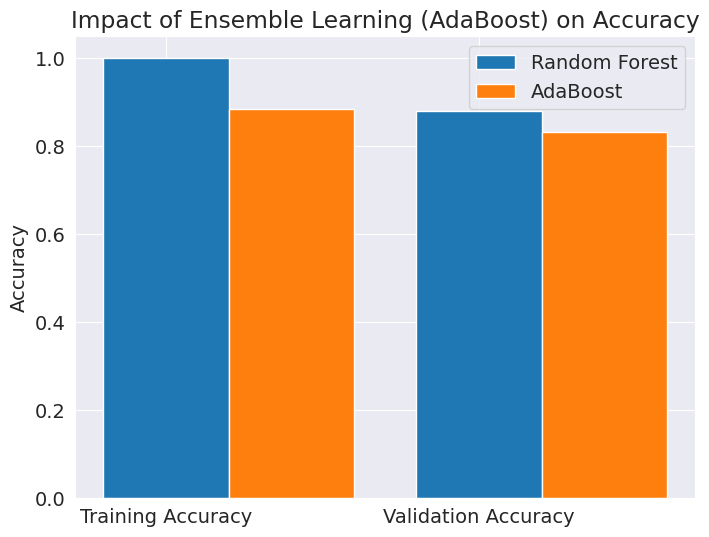

In [76]:
ensemble_results = {
    'Random Forest': [train_accuracy, val_accuracy],
    'AdaBoost': [train_accuracy_ada, val_accuracy_ada]
}

labels = ['Training Accuracy', 'Validation Accuracy']
rf_vals = ensemble_results['Random Forest']
ada_vals = ensemble_results['AdaBoost']

x = range(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(x, rf_vals, width=0.4, label='Random Forest', align='center')
plt.bar([i + 0.4 for i in x], ada_vals, width=0.4, label='AdaBoost', align='center')

plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Impact of Ensemble Learning (AdaBoost) on Accuracy')
plt.legend()

plt.show()

### 4. K-Fold Cross-Validation

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [78]:
model = RandomForestClassifier(random_state=42)

In [79]:
k_values = [5, 10, 15, 20]  
cv_scores = []

In [80]:
%%time
for k in k_values:
    scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')
    cv_scores.append(np.mean(scores))

CPU times: user 1min 27s, sys: 733 ms, total: 1min 28s
Wall time: 1min 28s


In [81]:
print("K-Fold Cross-Validation Scores (Accuracy):")
for k, score in zip(k_values, cv_scores):
    print(f"K={k}: {score:.4f}")

K-Fold Cross-Validation Scores (Accuracy):
K=5: 0.8395
K=10: 0.8382
K=15: 0.8406
K=20: 0.8407


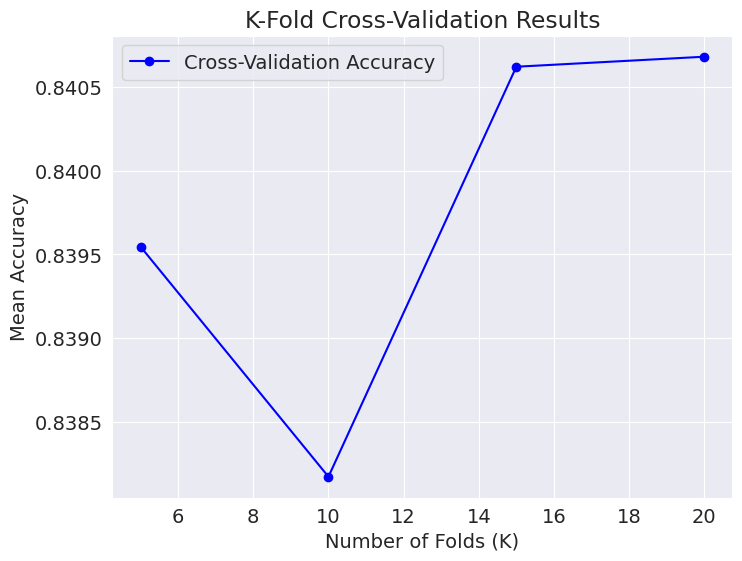

In [82]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b', label='Cross-Validation Accuracy')
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### 5. Principal Component Analysis (PCA)

In [83]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [84]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [85]:
rf_pca_model = RandomForestClassifier(random_state=42)
rf_pca_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [86]:
X_val_pca = pca.transform(X_val)  
train_accuracy_pca = accuracy_score(y_train, rf_pca_model.predict(X_train_pca))
val_accuracy_pca = accuracy_score(y_val, rf_pca_model.predict(X_val_pca))

In [87]:
print(f"Random Forest on PCA - Training Accuracy: {train_accuracy_pca:.4f}")
print(f"Random Forest on PCA - Validation Accuracy: {val_accuracy_pca:.4f}")

Random Forest on PCA - Training Accuracy: 0.9999
Random Forest on PCA - Validation Accuracy: 0.7828


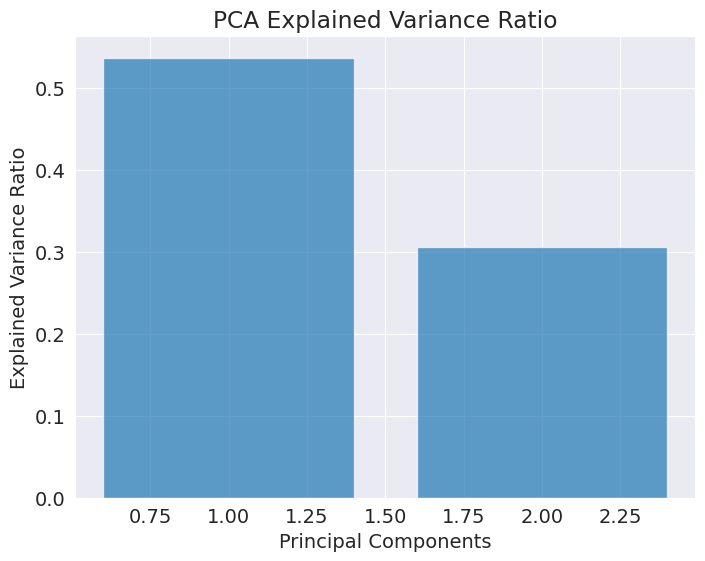

In [88]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

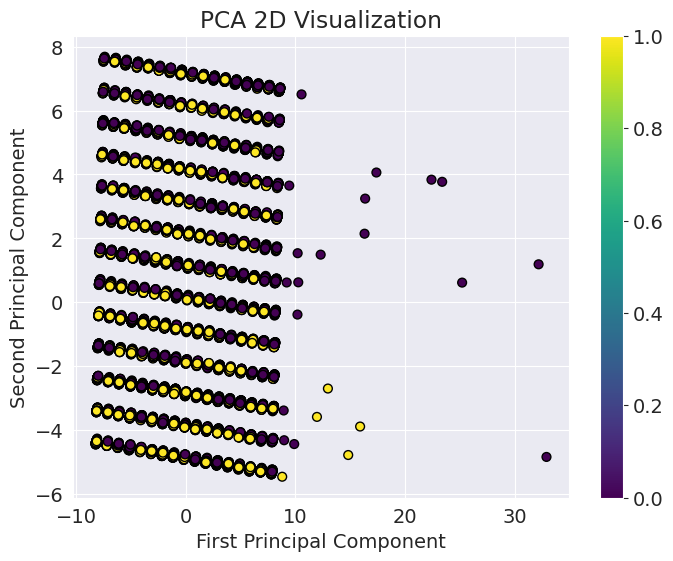

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA 2D Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

## Saving and Testing the Model with Manual Input

I used the Regularization model after reducing overfitting

In [90]:
import joblib

In [91]:
joblib.dump(rf_model_regularized, 'random_forest_model_regularized.joblib')
print("Model saved successfully!")

Model saved successfully!
